# Time-frequency analysis on sensors

The objective is to calculate power and phase locking value on sensors space data.

For this lecture we will use the MNE somatosensory dataset that contains
so called event related synchronizations (ERS) / desynchronizations (ERD)
in the beta band.

`
Authors: Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
         Denis Engemann <denis.engemann@gmail.com>
`

License: BSD (3-clause)


From Raw to Epochs

In [1]:
import numpy as np
import mne
from mne import io
from mne.time_frequency import tfr_morlet
from mne.datasets import somato

# reduce verbosity
mne.set_log_level('WARNING')

In [4]:
# Set parameters
data_path = somato.data_path()
raw_fname = data_path + '/MEG/somato/sef_raw_sss.fif'
event_id, tmin, tmax = 1, -1., 3.

In [6]:
# Setup for reading the raw data
raw = io.read_raw_fif(raw_fname)
baseline = (None, 0)
events = mne.find_events(raw, stim_channel='STI 014')

In [8]:
mne.viz.plot_events(events, raw.info['sfreq'])

In [9]:
_, times = raw[:, :]

In [11]:
(times.max() - times.min()) / 60.

14.951286286015705

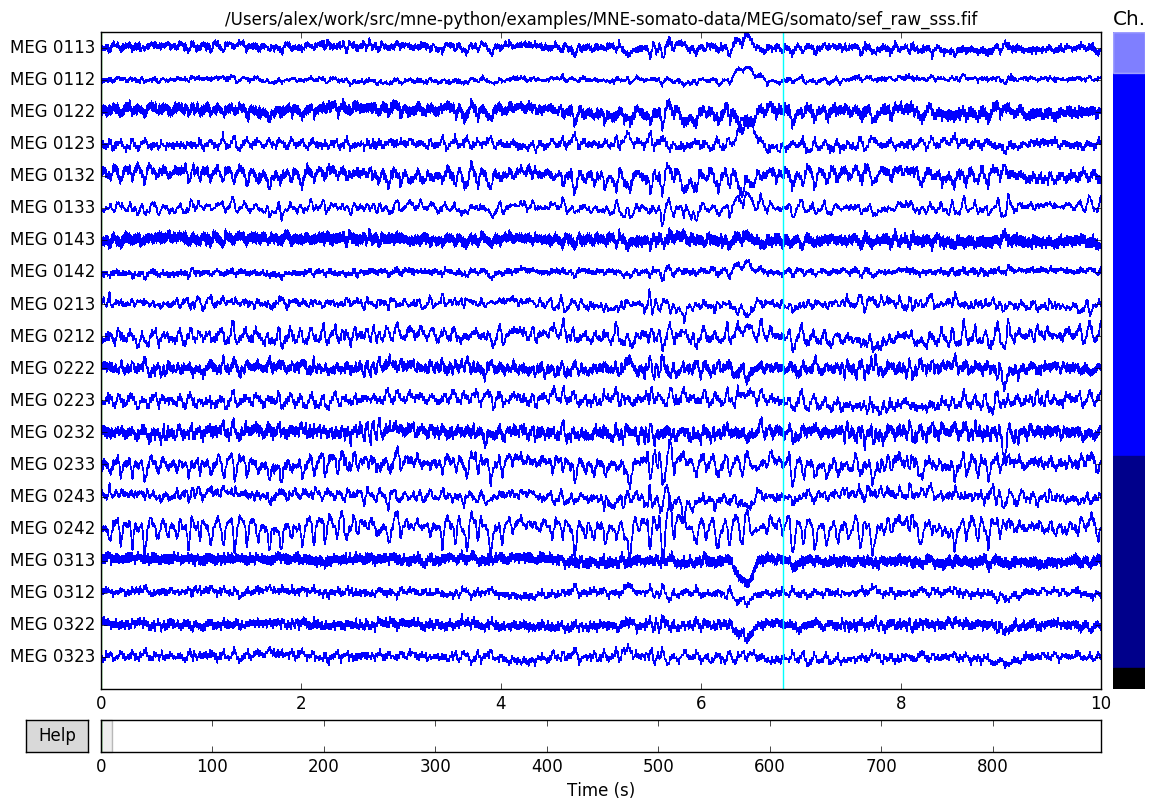

In [15]:
%matplotlib qt
raw.plot(events=events)

In [26]:
raw.info['sfreq']

300.3074951171875

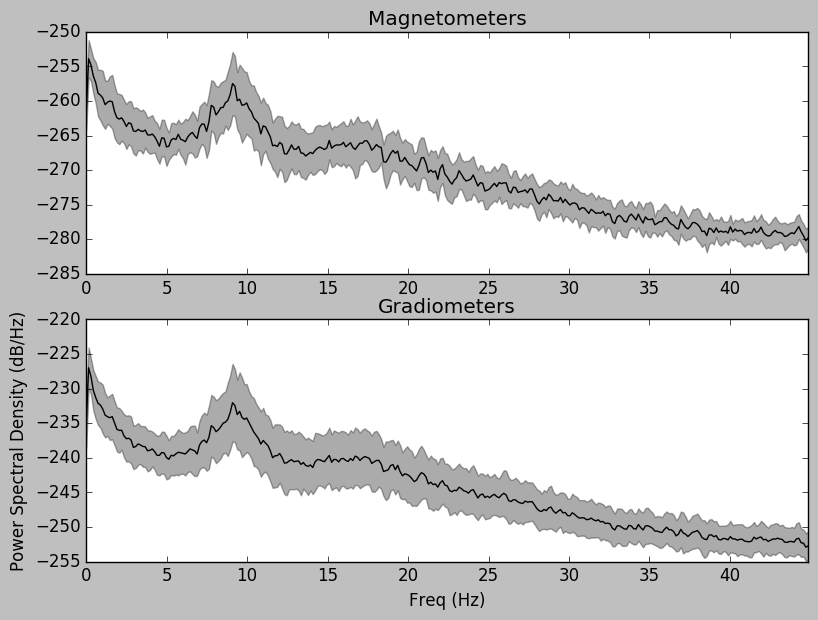

In [29]:
raw.plot_psd(fmax=45)

In [30]:
import matplotlib.pyplot as plt
plt.close('all')

In [32]:
# picks MEG gradiometers
picks = mne.pick_types(raw.info, meg='grad', eeg=False, eog=True, stim=False)

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=baseline, reject=dict(grad=4000e-13, eog=350e-6))

In [34]:
epochs.drop_bad()

<Epochs  |  n_events : 108 (all good), tmin : -0.998976065792 (s), tmax : 3.0002581176 (s), baseline : (None, 0)>

In [35]:
epochs

<Epochs  |  n_events : 108 (all good), tmin : -0.998976065792 (s), tmax : 3.0002581176 (s), baseline : (None, 0)>

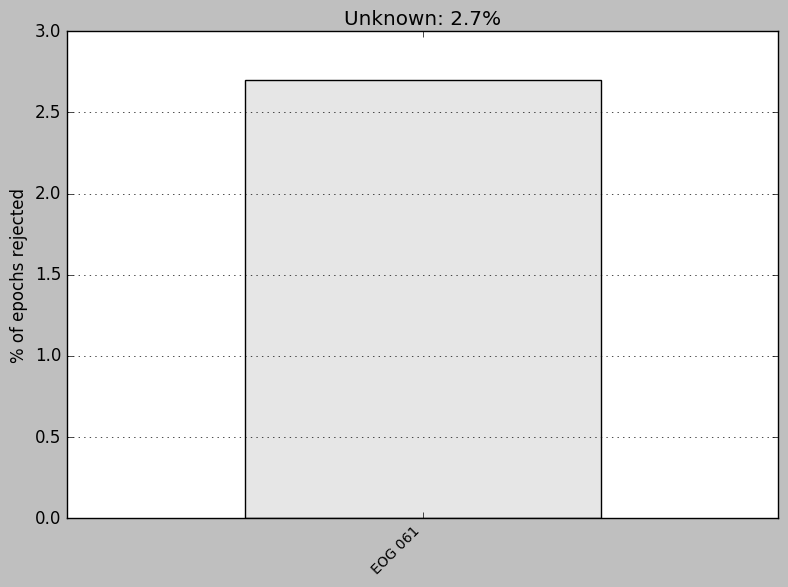

In [36]:
epochs.plot_drop_log()

In [43]:
epochs.drop_bad(reject=dict(eog=200e-6, grad=4e-10))

<Epochs  |  n_events : 54 (all good), tmin : -0.998976065792 (s), tmax : 3.0002581176 (s), baseline : (None, 0)>

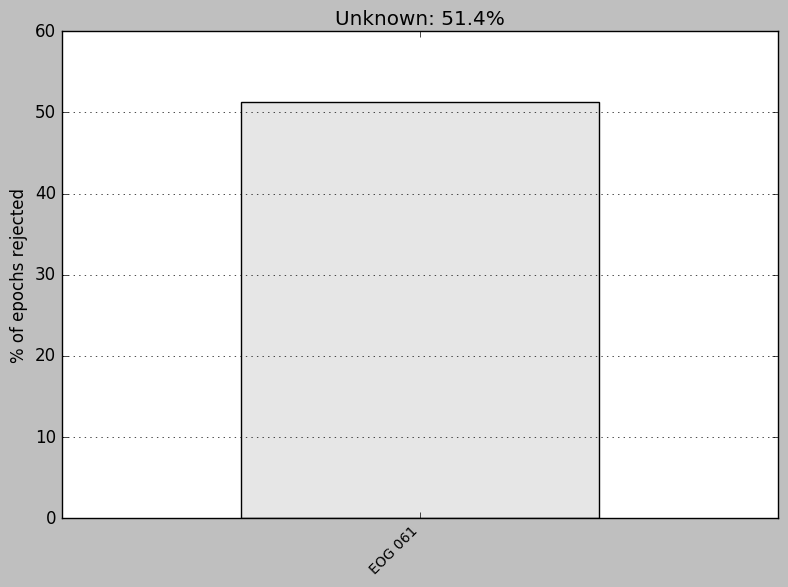

In [44]:
epochs.plot_drop_log()

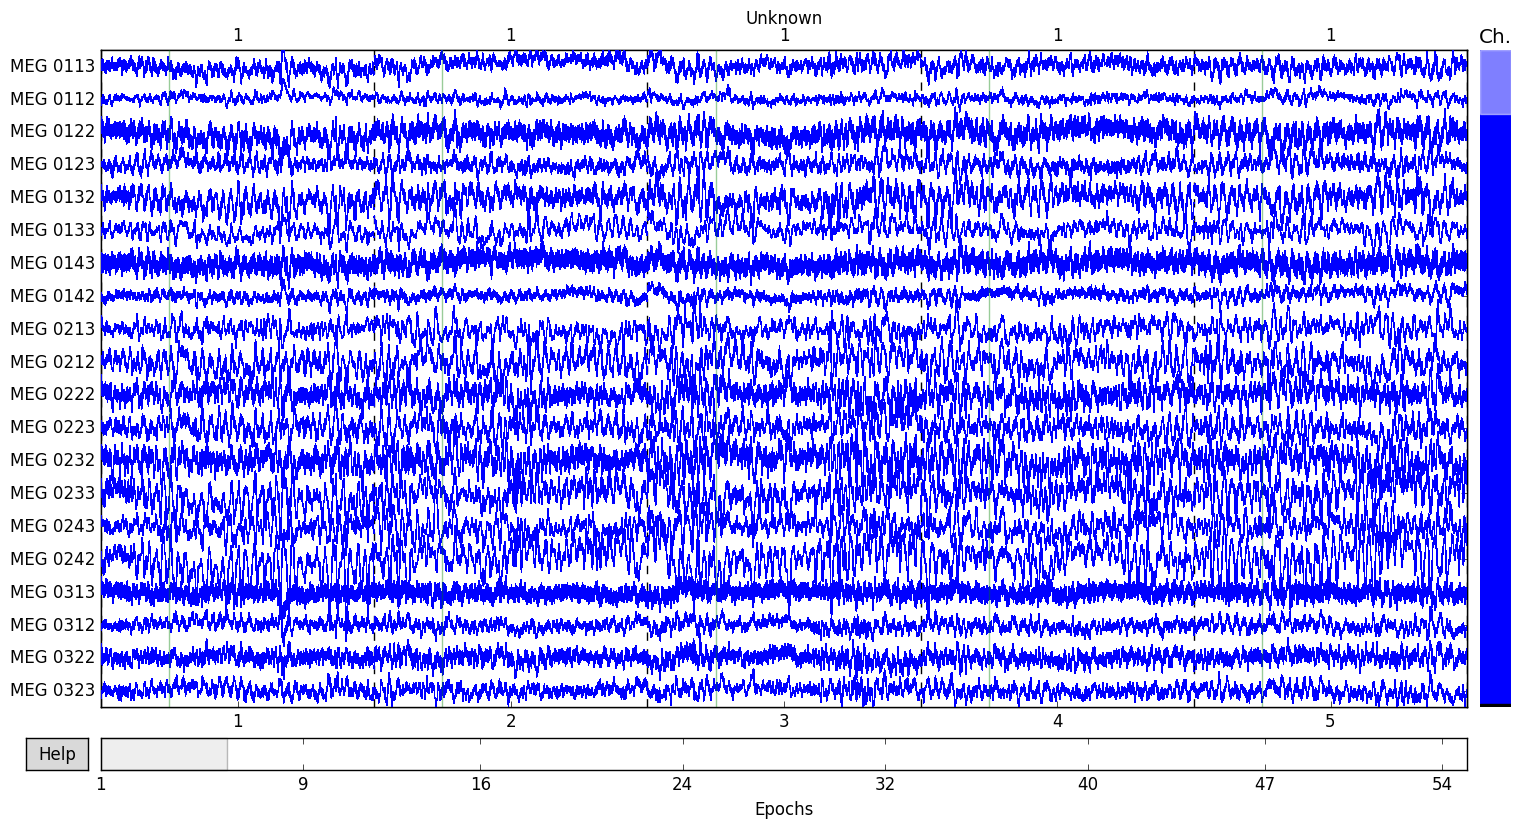

In [45]:
%matplotlib qt
epochs.plot(n_epochs=5)

/Users/alex/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


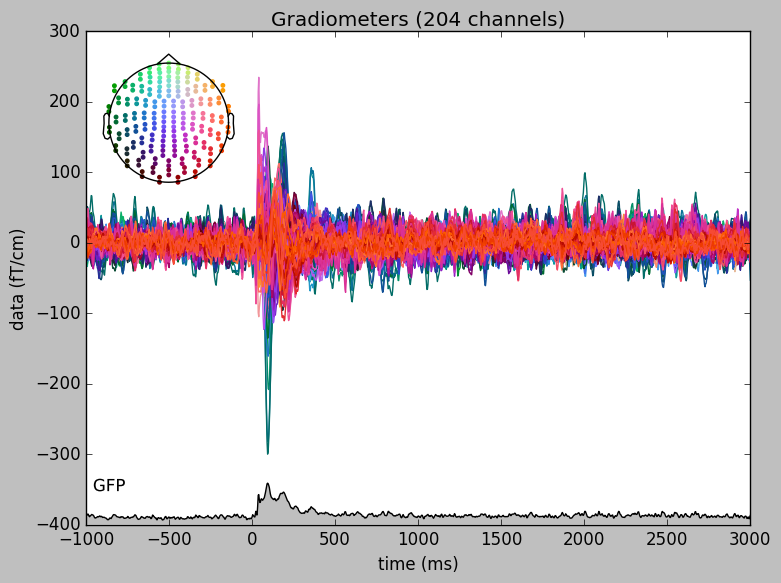

In [50]:
epochs.average().plot(spatial_colors=True, gfp=True)

Calculate power and intertrial coherence (between epochs phase locking value)

In [53]:
epochs_no_evoked = epochs.copy().subtract_evoked()

In [54]:
freqs = np.arange(6, 30, 3)  # define frequencies of interest
n_cycles = freqs / 2.  # different number of cycle per frequency
power, _ = tfr_morlet(epochs_no_evoked, freqs=freqs, n_cycles=n_cycles, use_fft=False,
                        return_itc=True, decim=3, n_jobs=1)

# Baseline correction can be applied to power or done in plots
# To illustrate the baseline correction in plots the next line is commented
# power.apply_baseline(baseline=(-0.5, 0), mode='logratio')

In [47]:
power

<AverageTFR  |  time : [-0.998976, 2.996928], freq : [6.000000, 27.000000], nave : 54, channels : 204>

Visualize results

In [56]:
%matplotlib qt
# Use qt to have interactive visualization options

# Inspect power
power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power');

In [58]:
plt.close('all')

In [65]:
mne.baseline.rescale??

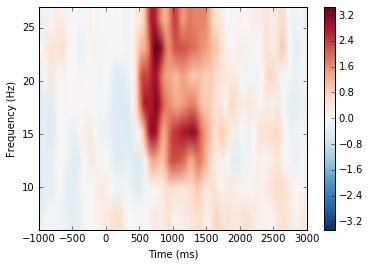

In [62]:
%matplotlib inline

power.plot([82], baseline=(-0.5, 0), mode='percent');

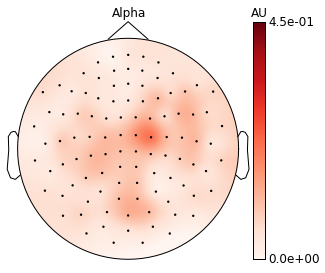

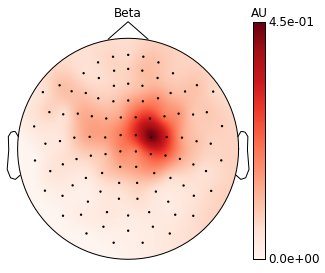

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

power.plot_topomap(ch_type='grad', tmin=0.5, tmax=1.5, fmin=8, fmax=12,
                   baseline=(-0.5, 0), mode='logratio',
                   title='Alpha', vmin=0., vmax=0.45);

power.plot_topomap(ch_type='grad', tmin=0.5, tmax=1.5, fmin=13, fmax=25,
                   baseline=(-0.5, 0), mode='logratio',
                   title='Beta', vmin=0., vmax=0.45);

### See also


[tfr_multitaper](http://martinos.org/mne/dev/generated/mne.time_frequency.tfr_multitaper.html)

[tfr_stockwell](http://martinos.org/mne/dev/generated/mne.time_frequency.tfr_stockwell.html)

for Multi-Taper analysis like Fieldtrip or the use of the Stockwell transform (S-Transform).

In [14]:
from mne.time_frequency import tfr_multitaper, tfr_stockwell

# ...

Excercise 1: visualize the phase locking value that was also returned
=====================================================================

Excercise 2: Compute power and phase lock in label of the source space
======================================================================

Compute time-frequency maps of power and phase lock in the source space for somato data.
The inverse method is linear based on dSPM inverse operator.
Hint: learn from this example.

http://martinos.org/mne/stable/auto_examples/time_frequency/plot_source_label_time_frequency.html

You'll need to compute forward and inverse solutions.